In [7]:
from sklearn.decomposition import FastICA

In [8]:
from materials import *
from inverse import *

In [9]:
INVERSE_GRID.fit(
    TRAIN_DATA[["p11", "p22", "p12"]],
    TRAIN_DATA[["angle", "ratio", "p_matrix", "p_fiber"]])

Fitting 5 folds for each of 107 candidates, totalling 535 fits


[CV 2/5] END preprocessing=PCA(), preprocessing__n_components=2, regressor=LinearRegression(); MSE: (train=-7521.329, test=-7553.648) R2: (train=0.264, test=0.263) total time=   0.2s
[CV 5/5] END preprocessing=PCA(), preprocessing__n_components=2, regressor=LinearRegression(); MSE: (train=-7524.605, test=-7540.176) R2: (train=0.264, test=0.263) total time=   0.2s
[CV 3/5] END preprocessing=PCA(), preprocessing__n_components=2, regressor=LinearRegression(); MSE: (train=-7536.632, test=-7492.303) R2: (train=0.265, test=0.261) total time=   0.2s
[CV 4/5] END preprocessing=PCA(), preprocessing__n_components=2, regressor=LinearRegression(); MSE: (train=-7539.841, test=-7479.717) R2: (train=0.263, test=0.266) total time=   0.2s
[CV 1/5] END preprocessing=PCA(), preprocessing__n_components=2, regressor=LinearRegression(); MSE: (train=-7515.640, test=-7576.080) R2: (train=0.264, test=0.266) total time=   0.3s
[CV 3/5] END preprocessing=PCA(), preprocessing__n_components=3, regressor=LinearRegr

GridSearchCV(estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('preprocessing', 'passthrough'),
                                       ('regressor', 'passthrough')]),
             n_jobs=-1,
             param_grid=[{'preprocessing': [PCA(), FastICA()],
                          'preprocessing__n_components': [2, 3],
                          'regressor': [LinearRegression(),
                                        DecisionTreeRegressor()]},
                         {'preprocessing': [FunctionTransformer(func=<function <lambda> at 0x7f78f...
                          'regressor': [RandomForestRegressor()],
                          'regressor__n_estimators': [5, 20, 50]},
                         {'preprocessing': [FunctionTransformer(func=<function <lambda> at 0x7f78f3c67ce0>)],
                          'regressor': [RandomForestRegressor()],
                          'regressor__n_estimators': [5, 20, 50]}],
             refit='R2', return_train_score=True,
             scoring={'MSE': make_scorer(mean_squared_error, greater_is_better=False),
                      'R2': make_scorer(r2_score)},
             verbose=4)

In [10]:
INVERSE_GRID.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('preprocessing', FastICA(n_components=3)),
                ('regressor', KNeighborsRegressor(n_neighbors=10))])

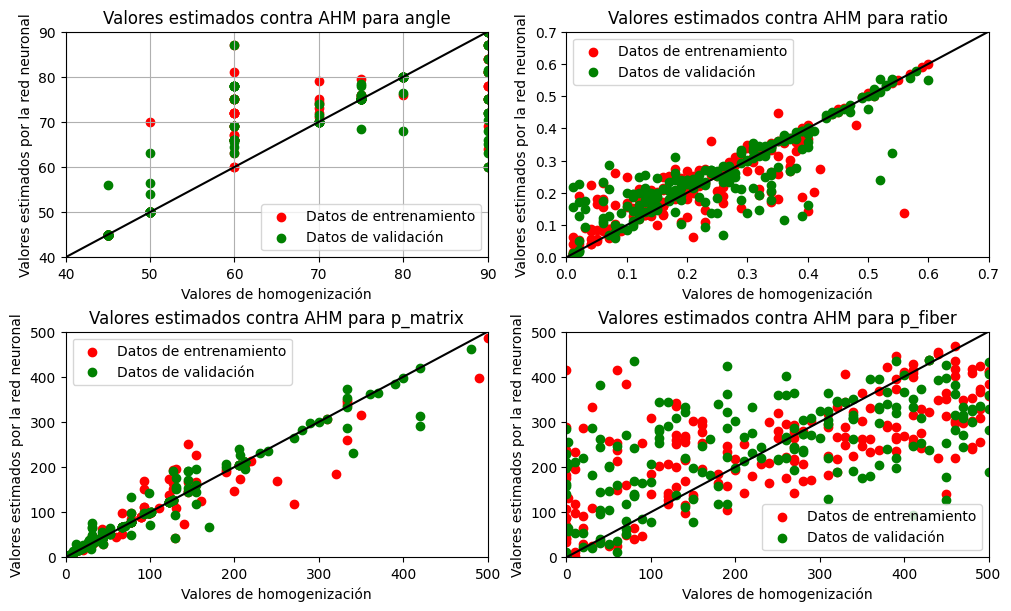

In [16]:
_, TRAIN_SAMPLES = train_test_split(TRAIN_DATA, test_size=200, random_state=2000)
# TRAIN_SAMPLES=TRAIN_DATA

_, VALIDATION_SAMPLES = train_test_split(
    VALIDATION_DATA, test_size=200, random_state=2000
)
# VALIDATION_SAMPLES=VALIDATION_DATA

# Draw graph with comparison of predicted vs AHM values for train and validation data
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6), layout="constrained")

graph_angle = plt.subplot2grid((2, 2), (0, 0))
graph_angle.grid(True)
# graph_angle.set_xscale("log", nonpositive="clip")
# graph_angle.set_yscale("log", nonpositive="clip")

graph_ratio = plt.subplot2grid((2, 2), (0, 1))
# graph_ratio.grid(True)
# graph_ratio.set_xscale("log", nonpositive="clip")
# graph_ratio.set_yscale("log", nonpositive="clip")

graph_p_matrix = plt.subplot2grid((2, 2), (1, 0))
# graph_p_matrix.grid(True)
# graph_p_matrix.set_xscale("log", nonpositive="clip")
# graph_p_matrix.set_yscale("log", nonpositive="clip")

graph_p_fiber = plt.subplot2grid((2, 2), (1, 1))
# graph_p_fiber.grid(True)
# graph_p_fiber.set_xscale("log", nonpositive="clip")
# graph_p_fiber.set_yscale("log", nonpositive="clip")


x_train, y_train = (TRAIN_SAMPLES), (
    INVERSE_GRID.predict(TRAIN_SAMPLES[["p11", "p22", "p12"]])
)

x_validation, y_validation = (VALIDATION_SAMPLES), (
    INVERSE_GRID.predict(VALIDATION_SAMPLES[["p11", "p22", "p12"]])
)

graph_angle.scatter(
    x_train["angle"],
    y_train[:, 0],
    color="red",
    label="Datos de entrenamiento",
)
graph_angle.scatter(
    x_validation["angle"],
    y_validation[:, 0],
    color="green",
    label="Datos de validación",
)

# Plot a line for the 1:1 relationship
graph_angle.plot([40, 90], [40, 90], color="black")

# Limit x and y to the range between -40 and 10
graph_angle.set_xlim([40, 90])
graph_angle.set_ylim([40, 90])

graph_ratio.scatter(
    x_train["ratio"],
    y_train[:, 1],
    color="red",
    label="Datos de entrenamiento",
)
graph_ratio.scatter(
    x_validation["ratio"],
    y_validation[:, 1],
    color="green",
    label="Datos de validación",
)

# Plot a line for the 1:1 relationship
graph_ratio.plot([0.0, 0.7], [0.0, 0.7], color="black")

# Limit x and y to the range between 0 and 1000
graph_ratio.set_xlim([0, 0.7])
graph_ratio.set_ylim([0, 0.7])

graph_p_matrix.scatter(
    x_train["p_matrix"],
    y_train[:, 2],
    color="red",
    label="Datos de entrenamiento",
)
graph_p_matrix.scatter(
    x_validation["p_matrix"],
    y_validation[:, 2],
    color="green",
    label="Datos de validación",
)

# Plot a line for the 1:1 relationship
graph_p_matrix.plot([0, 500], [0, 500], color="black")

# Limit x and y to the range between 0 and 1000
graph_p_matrix.set_xlim([0, 500])
graph_p_matrix.set_ylim([0, 500])

graph_p_fiber.scatter(
    x_train["p_fiber"],
    y_train[:, 3],
    color="red",
    label="Datos de entrenamiento",
)
graph_p_fiber.scatter(
    x_validation["p_fiber"],
    y_validation[:, 3],
    color="green",
    label="Datos de validación",
)

# Plot a line for the 1:1 relationship
graph_p_fiber.plot([0, 500], [0, 500], color="black")

# Limit x and y to the range between 0 and 1000
graph_p_fiber.set_xlim([0, 500])
graph_p_fiber.set_ylim([0, 500])


graph_angle.set_xlabel("Valores de homogenización")
graph_angle.set_ylabel("Valores estimados por la red neuronal")
graph_angle.set_title("Valores estimados contra AHM para angle")

graph_ratio.set_xlabel("Valores de homogenización")
graph_ratio.set_ylabel("Valores estimados por la red neuronal")
graph_ratio.set_title("Valores estimados contra AHM para ratio")

graph_p_matrix.set_xlabel("Valores de homogenización")
graph_p_matrix.set_ylabel("Valores estimados por la red neuronal")
graph_p_matrix.set_title("Valores estimados contra AHM para p_matrix")

graph_p_fiber.set_xlabel("Valores de homogenización")
graph_p_fiber.set_ylabel("Valores estimados por la red neuronal")
graph_p_fiber.set_title("Valores estimados contra AHM para p_fiber")

graph_angle.legend()
graph_ratio.legend()
graph_p_matrix.legend()
graph_p_fiber.legend()

plt.show()

In [12]:
[
    estimator.predict(TRAIN_DATA[["p11", "p22", "p12"]][69:70])
    for estimator in INVERSE_GRID.best_estimator_.steps[2][1].estimators_
]

AttributeError: 'KNeighborsRegressor' object has no attribute 'estimators_'

In [ ]:
import pandas as pd

rows = [v for k, v in GRID.cv_results_.items() if k.startswith("split") and "_test_" in k and k.endswith("R2")]

df=pd.DataFrame(
    [list(row) for row in zip(*rows)],
    columns=["split" + str(i) for i in range(5)],
    index=[get_pipe_name(pipe) for pipe in GRID.cv_results_["params"]],
    dtype=float
)

df

NameError: name 'GRID' is not defined

In [ ]:
INVERSE_GRID.best_score_

0.7099311079810912